In [1]:
#import all the required packages

import time                                             # for time functions
import random                                           # random state

import numpy as np                                      # for mathematical manipulations
import pandas as pd                                     # for dataframe related operations

import matplotlib.pyplot as plt                         # visualisation
import seaborn as sns                                   # visualisation
plt.style.use('fivethirtyeight')                        # styling the plots

from sklearn.cross_validation import train_test_split   # to split data into train and test sets
from sklearn.preprocessing import StandardScaler        # standardize data
from sklearn.decomposition import PCA                   # PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier     # Classification

from sklearn.metrics import accuracy_score,recall_score,precision_score     #metrics
from sklearn.metrics import classification_report                           #metrics report

%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#load the data
df = pd.read_csv('scada.csv')
df.head()

,TimeStamp,Unnamed: 1,Ambient OK Timer,Generator Operation Timer,Grid OK Timer,Grid ON Timer,Operation Timer,Turbine Availbility Timer,Wind Speed OK Timer,Unnamed: 9,...,Mean Generator Speed (rpm),Max Generator Speed (rpm),Min Generator Speed (rpm),Unnamed: 51,Min Pitch Angle for Blade 1 (deg),Max Pitch Angle for Blade 1 (deg),Unnamed: 54,Wind Speed (m/s),Max Wind Speed Outside Nacelle (m/s),Min Wind Speed Outside Nacelle (m/s)
0,2/12/13 14:40,NaN,600,600,600,600,600,600,600,NaN,...,1515,1522,1508,NaN,0.0,0.9,NaN,OP,9.5,7.8
1,2/12/13 14:50,NaN,600,600,600,600,600,600,600,NaN,...,1516,1524,1509,NaN,0.0,1.3,NaN,OP,9.6,7.7
2,2/12/13 15:00,NaN,600,600,600,600,600,600,600,NaN,...,1518,1528,1510,NaN,-0.2,1.2,NaN,OP,10.5,7.9
3,2/12/13 15:10,NaN,600,600,600,600,600,600,600,NaN,...,1521,1532,1513,NaN,-0.7,0.5,NaN,OP,10.2,8.6
4,2/12/13 15:20,NaN,600,600,600,600,600,600,600,NaN,...,1523,1533,1512,NaN,-0.8,0.5,NaN,OP,10.8,8.8


In [3]:
df.shape

(17151, 58)

In [4]:
df.columns

Index(['TimeStamp', 'Unnamed: 1', 'Ambient OK Timer ',
       'Generator Operation Timer', 'Grid OK Timer ', 'Grid ON Timer ',
       'Operation Timer ', 'Turbine Availbility Timer ',
       'Wind Speed OK Timer ', 'Unnamed: 9', 'Total Operating Hours of Yaw ',
       'Unnamed: 11', 'GS Phase 1 (A) ', 'GS Phase 2 (A) ', 'GS Phase 3 (A)',
       'Unnamed: 15', 'Operating Frequency (Hz) ', 'Unnamed: 17',
       'Active Power (W) ', 'Unnamed: 19', 'Power Factor', 'Unnamed: 21',
       'GS Phase 1 (V)', 'GS Phase 2 (V) ', 'GS Phase 3 (V) ', 'Unnamed: 25',
       'Total Active Energy (W)', 'Total Reactive Energy (W) ', 'Unnamed: 28',
       'Hydraulic Temperature (C) ', 'Unnamed: 30',
       'Temperature Outside Nacelle (C) ', 'Temperature Inside Nacelle ',
       'Unnamed: 33', 'Gearbox Oil Temperature (C) ', 'Unnamed: 35',
       'Generator Stator Temperature (C) ', 'Unnamed: 37',
       'Slip Ring Temperature (C) ', 'Unnamed: 39',
       'Controller Temperature (C) ', 'Unnamed: 41',
    

In [5]:
df.drop(df.columns[[1, 9, 11, 15, 17, 19, 21, 25, 28, 30, 33, 35, 37, 39, 41, 44, 47, 51, 54]], axis=1, inplace = True)
df.drop(['TimeStamp', 'Slip Ring Temperature (C) ', 'Wind Speed (m/s) '], axis=1, inplace=True)

In [6]:
df.shape

(17151, 36)

In [7]:
df.tail()

,Ambient OK Timer,Generator Operation Timer,Grid OK Timer,Grid ON Timer,Operation Timer,Turbine Availbility Timer,Wind Speed OK Timer,Total Operating Hours of Yaw,GS Phase 1 (A),GS Phase 2 (A),...,Active Power Generation (W),Min Rotor Speed (rpm) in 10 mins,Max Rotor Speed (RS) in 10 mins,Mean Generator Speed (rpm),Max Generator Speed (rpm),Min Generator Speed (rpm),Min Pitch Angle for Blade 1 (deg),Max Pitch Angle for Blade 1 (deg),Max Wind Speed Outside Nacelle (m/s),Min Wind Speed Outside Nacelle (m/s)
17146,600,600,600,600,600,600,600,0,313.3,311.6,...,585100,28.8,29.0,1522,1533,1514,-0.7,0.4,11.1,8.7
17147,600,600,600,600,600,600,600,0,294.2,292.2,...,611700,28.8,29.0,1521,1533,1512,-0.6,0.8,10.8,8.4
17148,600,600,600,600,600,600,600,0,350.5,349.8,...,613800,28.8,29.0,1523,1533,1514,-0.9,0.3,11.3,8.9
17149,600,600,600,600,600,600,600,10,380.0,381.4,...,679800,28.9,29.7,1526,1569,1514,-1.0,0.5,11.5,9.2
17150,600,600,600,600,600,600,600,0,416.3,416.7,...,679000,28.9,29.3,1526,1545,1515,-1.1,0.0,11.9,9.6


In [8]:
df.describe()

,Ambient OK Timer,Generator Operation Timer,Grid OK Timer,Grid ON Timer,Operation Timer,Turbine Availbility Timer,Wind Speed OK Timer,Total Operating Hours of Yaw,GS Phase 1 (A),GS Phase 2 (A),...,Active Power Generation (W),Min Rotor Speed (rpm) in 10 mins,Max Rotor Speed (RS) in 10 mins,Mean Generator Speed (rpm),Max Generator Speed (rpm),Min Generator Speed (rpm),Min Pitch Angle for Blade 1 (deg),Max Pitch Angle for Blade 1 (deg),Max Wind Speed Outside Nacelle (m/s),Min Wind Speed Outside Nacelle (m/s)
count,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,...,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000
mean,599.483995,487.180339,599.100927,599.848988,595.172876,599.555128,502.510058,26.797854,256.579826,251.073034,...,389578.951665,27.062813,27.930331,1431.935572,1476.123375,1393.501137,4.970340,7.760912,10.461938,8.123048
std,13.541284,227.966910,20.130386,6.366406,51.765260,12.231741,212.602922,34.296544,214.029683,216.415612,...,272244.916217,6.053728,5.839091,316.355553,304.968177,338.817768,10.346552,11.329949,5.248089,4.174278
min,10.000000,0.000000,0.000000,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.400000,-1.100000,0.000000,0.000000
25%,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,0.000000,49.800000,31.400000,...,117500.000000,28.500000,28.600000,1505.000000,1512.000000,1500.000000,0.300000,1.800000,6.200000,5.100000
50%,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,20.000000,205.400000,199.900000,...,415900.000000,28.700000,28.900000,1515.000000,1525.000000,1507.000000,1.800000,2.200000,9.600000,7.400000
75%,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,40.000000,516.800000,514.850000,...,676900.000000,29.300000,30.300000,1547.000000,1600.000000,1514.000000,4.100000,10.500000,13.700000,10.900000
max,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,564.600000,559.200000,...,747200.000000,29.700000,31.800000,1570.000000,1694.000000,1544.000000,86.700000,86.800000,36.800000,29.100000


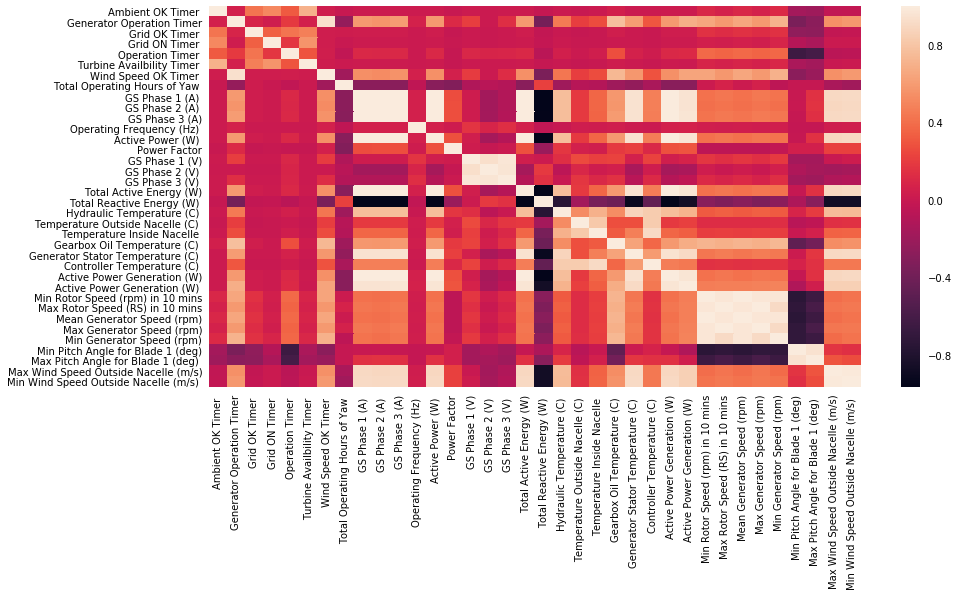

In [9]:
corr=df.corr()
sns.set_context("notebook", rc={"lines.linewidth":1})
plt.figure(figsize=(13,7))
a=sns.heatmap(corr,annot=False)

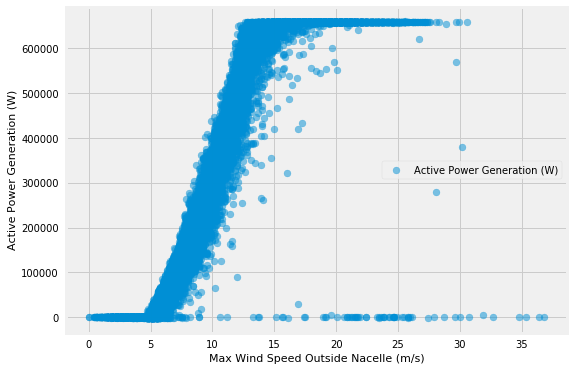

In [10]:
# plot of Max Wind Speed Outside Nacelle (m/s) vs Active Power Generation (W)
plt.figure(figsize=(8, 6))
plt.scatter(df['Max Wind Speed Outside Nacelle (m/s)'], df['Active Power Generation (W)'], alpha=0.5, label='Active Power Generation (W)')
plt.ylabel('Active Power Generation (W)')
plt.xlabel('Max Wind Speed Outside Nacelle (m/s)')
plt.legend(loc='best')

In [11]:
target = df['Active Power Generation (W)']                         # store target column in a variable
df.drop('Active Power Generation (W)', axis=1, inplace=True)       # drop the column from the dataframe

## Split the data into traning and test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df, target, random_state=123)

We are going to train a RandomForest classifier before applying PCA and measure the performance

# Principal Component Analysis (PCA)
Principal component analysis is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components

* With PCA we can reduce the dimentions with out losing much information
* PCA also helps to remove the multicollinearity between the variables

In [13]:
# we have to standardize data before applying PCA
scaler=StandardScaler()                                # initialize the standard scaler
X_train_std = scaler.fit_transform(X_train)            # standardize the train data
X_test_std= scaler.transform(X_test)                   # standardize the test data
# apply PCA
pca = PCA().fit(X_train_std)                           # fit X_std data to PCA

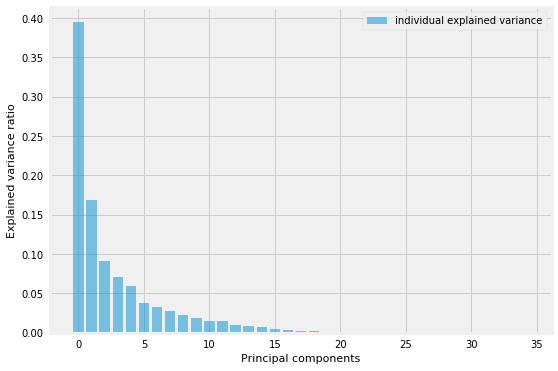

In [14]:
# plot individual variance percentage explained by the principal components
plt.figure(figsize=(8, 6))
plt.bar(range(35), pca.explained_variance_ratio_, alpha=0.5, label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

Text(11,0.95,'11')

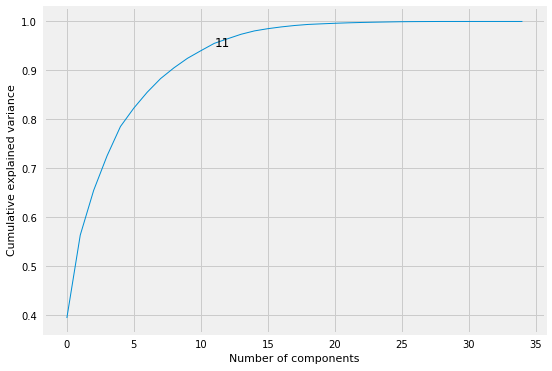

In [15]:
plt.figure(figsize=(8, 6)) 
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='Cumilative variance explained')               
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('11', xy=(11, .95))

Text(0.5,1,'correlation between principal components')

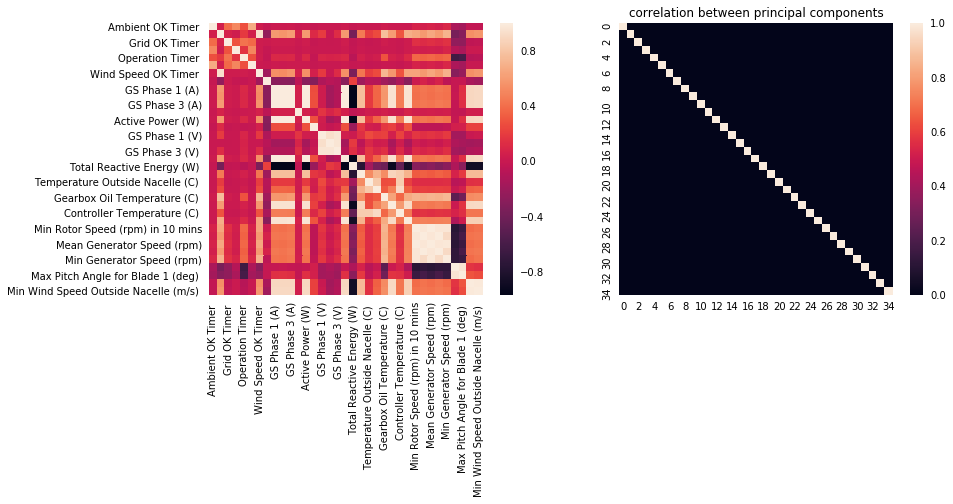

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,5))                        # multiple plots 
sns.heatmap(X_train.corr(), ax=ax1)                                           # plot 1 correlation between variables
sns.heatmap(pd.DataFrame(PCA().fit_transform(X_train_std)).corr(), ax=ax2)    # plot 2 correlation beteen principal components
plt.title('correlation between principal components')

# PCA
Consider the first 11 principal components as they are explaining 95% of variation in the data

In [17]:
#consider first 11 components as they are explaining the 94% of variation in the data
x_pca = PCA(n_components=11)                            # initialise pca with 11 components
X_train_std_pca = x_pca.fit_transform(X_train_std)      # fit and transform train data
X_test_std_pca =x_pca.transform(X_test_std)             # transform test data

In [18]:
X_train_std_pca.shape

(12863, 11)

In [19]:
from  sklearn.decomposition import  PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import MDS
from sklearn.manifold import Isomap

tsne = TSNE(n_components=2,random_state = 42)
pca = PCA(n_components=2, random_state = 42)
kernel_pca = KernelPCA(n_components=2, kernel='cosine',random_state =42)
lda = LinearDiscriminantAnalysis(n_components=2)
lle = LocallyLinearEmbedding(n_components=2, random_state = 42)
mds = MDS(n_components=2, random_state = 42)
isomap = Isomap(n_components=2)

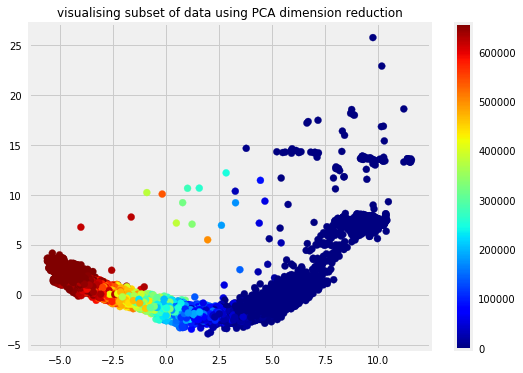

In [20]:
X_reduced = pca.fit_transform(X_train_std, y_train)
plt.figure(figsize=(8, 6))
plt.title("visualising subset of data using PCA dimension reduction")
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y_train, cmap = plt.get_cmap('jet'))
plt.colorbar()

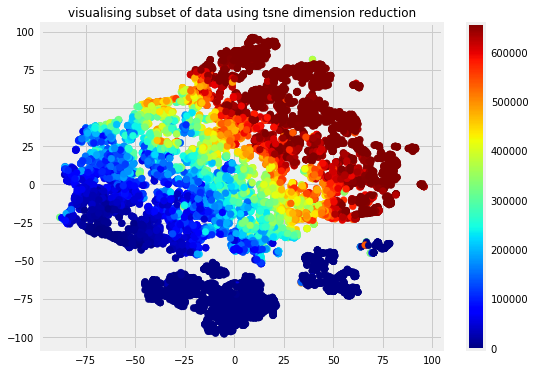

In [21]:
X_reduced = tsne.fit_transform(X_train_std, y_train)
plt.figure(figsize=(8, 6))
plt.title("visualising subset of data using tsne dimension reduction")
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y_train, cmap = plt.get_cmap('jet'))
plt.colorbar()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


IndexError: index 1 is out of bounds for axis 1 with size 1

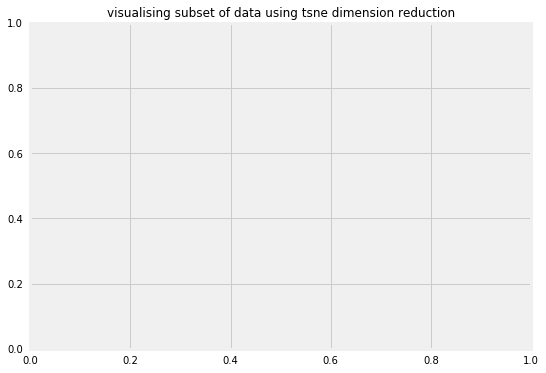

In [22]:
X_reduced = lda.fit_transform(X_train_std, y_train)
plt.figure(figsize=(8, 6))
plt.title("visualising subset of data using tsne dimension reduction")
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y_train, cmap = plt.get_cmap('jet'))
plt.colorbar()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


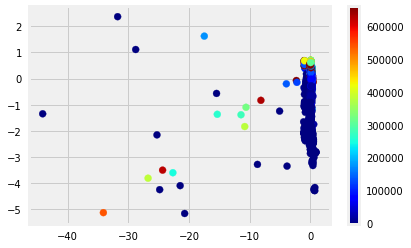

In [23]:
from sklearn.decomposition import RandomizedPCA

# Compute the components and projected 
pca = RandomizedPCA(11).fit(X_train_std)
components = pca.transform(X_train_std)
projected = pca.inverse_transform(components)
plt.scatter(projected[:,0], projected[:,1], c = y_train, cmap = plt.get_cmap('jet'))
plt.colorbar()

In [24]:
X_reduced = mds.fit_transform(X_train_std, y_train)
plt.figure(figsize=(8, 6))
plt.title("visualising subset of data using tsne dimension reduction")
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y_train, cmap = plt.get_cmap('jet'))
plt.colorbar()

MemoryError: 

In [ ]:
X_reduced = tsne.fit_transform(X_train_std, y_train)
plt.figure(figsize=(8, 6))
plt.title("visualising subset of data using tsne dimension reduction")
plt.scatter(X_reduced[:,0], X_reduced[:,1], c = y_train, cmap = plt.get_cmap('jet'))
plt.colorbar()

In [ ]:
#MDS Function
def runMDS (matrix):  
    results = mds.fit(matrix)
    coords = results.embedding_

    #Plotting
    plt.subplots_adjust()
    plt.scatter(coords[:, 0], coords[:, 1], marker = 'o')

    #Labeling
    for label, x, y in zip(col_names, coords[:, 0], coords[:, 1]):
        plt.annotate(label, xy = (x, y), xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom', 
                     bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                     arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

    #Print
    plt.show()

In [ ]:
runMDS(X_train_std)